# Vimeo Exploratory Data Analysis

## [Vimeo Analytics FAQs](https://vimeo.zendesk.com/hc/en-us/articles/360034128752-Advanced-Analytics)
## [Vimeo Video Manager analytics help](https://vimeo.zendesk.com/hc/en-us/articles/115004386887-Video-Manager-analytics-panel)

# Analytics Overview
* plot engagement over time for each project

# Loading and Exploring the Data

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
data_dir = './data/Spreadsheets_2019/'

In [6]:
time_window_dirs = os.listdir(data_dir)

In [7]:
os.listdir(data_dir+time_window_dirs[0])

['Vimeo_Device_(11_13_2019)-(12_10_2019).csv',
 'Vimeo_Region_(11_13_2019)-(12_10_2019).csv',
 'Facebook_Page_(11_13_2019)-(12_10_2019).xls',
 'Vimeo_Video_(11_13_2019)-(12_10_2019).csv',
 'Facebook_Post_(11_13_2019)-(12_10_2019).xls',
 'Vimeo_Date_(11_13_2019)-(12_10_2019).csv',
 'Vimeo_Source_(11_13_2019)-(12_10_2019).csv',
 'Twitter_(11_13_2019)-(12_10_2019).csv']

In [8]:
vimeo_device_dfs = []
vimeo_region_dfs = []
vimeo_video_dfs = []
vimeo_date_dfs = []
vimeo_source_dfs = []

In [10]:
vimeo_device_dfs = []
vimeo_region_dfs = []
vimeo_video_dfs = []
vimeo_date_dfs = []
vimeo_source_dfs = []

for window_dir in time_window_dirs:
    file_names = os.listdir(data_dir+window_dir)
    for file_name in file_names:
        if 'Vimeo_Device' in file_name:
            vimeo_device_dfs.append(pd.read_csv(data_dir+window_dir+"/"+file_name))
        if 'Vimeo_Region' in file_name:
            vimeo_region_dfs.append(pd.read_csv(data_dir+window_dir+"/"+file_name))
        if 'Vimeo_Video' in file_name:
            video_df = pd.read_csv(data_dir+window_dir+"/"+file_name)
            video_df.columns = ['Project ID'] + video_df.columns[1:].to_list() # make the project id column name consistent
            video_df.plays = video_df.plays.replace('\r\n', np.nan)
            video_df = video_df[~video_df.isnull().all(axis=1)] # remove all completely null rows
            vimeo_video_dfs.append(video_df)
        if 'Vimeo_Date' in file_name:
            vimeo_date_dfs.append(pd.read_csv(data_dir+window_dir+"/"+file_name))
        if 'Vimeo_Source' in file_name:
            vimeo_source_dfs.append(pd.read_csv(data_dir+window_dir+"/"+file_name))
            
vimeo_device_df = pd.concat(vimeo_device_dfs, axis=0, sort=False)
vimeo_region_df = pd.concat(vimeo_region_dfs, axis=0, sort=False)
vimeo_video_df = pd.concat(vimeo_video_dfs, axis=0, sort=False)
vimeo_date_df = pd.concat(vimeo_date_dfs, axis=0, sort=False)
vimeo_source_df = pd.concat(vimeo_source_dfs, axis=0, sort=False)

# Fill in null project ids for vimeo_video_df

In [19]:
v = vimeo_video_df.uri.iloc[0]
vimeo_video_df[vimeo_video_df['uri'] == v]['Project ID'].value_counts().idxmax()

'BG'

In [20]:
null_vimeo_video_df = vimeo_video_df[vimeo_video_df['Project ID'].isnull()]

for ind, row in null_vimeo_video_df.iterrows():
    correct_proj_id = vimeo_video_df[vimeo_video_df['uri'] == row['uri']]['Project ID'].value_counts().idxmax()
    vimeo_video_df.loc[ind,'Project ID'] = correct_proj_id

# Vimeo Video

# Cleaning Note:
* The `Project ID` column is sometimes named `Project Code` or is unnamed entirely and shows as `Unnamed: 0` in pandas.
    * The proper project id is always the first column, so I changed the names of each first column to match
* After accounting for this and removing rows in which all values are NaN, we still see a few projects with missing project IDs

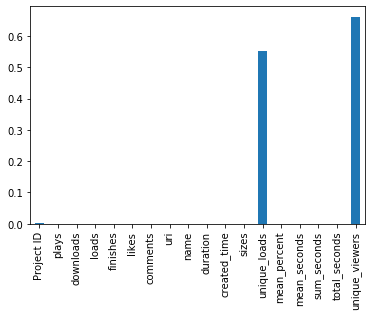

In [11]:
(vimeo_video_df.isnull().sum(axis=0) / len(vimeo_video_df)).plot(kind='bar', rot=90)

In [12]:
vimeo_video_df['Project ID'].isnull().sum() / len(vimeo_video_df)

0.003974826101358066

In [13]:
null_vimeo_video_df = vimeo_video_df[vimeo_video_df['Project ID'].isnull()]

In [14]:
len(null_vimeo_video_df)

12

In [17]:
vimeo_video_df[vimeo_video_df['uri'] == '/videos/328316689']

,Project ID,plays,downloads,loads,finishes,likes,comments,uri,name,duration,created_time,sizes,unique_loads,mean_percent,mean_seconds,sum_seconds,total_seconds,unique_viewers
224,GEN,2,0.0,41.0,1.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,8.0,59.0,78.0,157.0,266.0,2.0
211,GEN,2,0.0,15.0,1.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,6.0,9.0,18.0,265.0,NaN
76,GEN,14,0.0,563.0,6.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,140.0,56.0,59.0,829.0,1859.0,NaN
129,NaN,9,0.0,21.0,3.0,1.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,20.0,20.0,187.0,1197.0,NaN
179,GEN,3,0.0,46.0,0.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,11.0,26.0,35.0,105.0,399.0,2.0
206,GEN,2,0.0,12.0,2.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,49.0,66.0,132.0,265.0,NaN
149,GEN,6,0.0,54.0,4.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,7.0,99.0,88.0,528.0,798.0,4.0
263,GEN,1,0.0,5.0,1.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,0.0,0.0,0.0,132.0,NaN
119,GEN,9,0.0,27.0,3.0,0.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,46.0,41.0,374.0,1195.0,NaN


In [15]:
null_vimeo_video_df

,Project ID,plays,downloads,loads,finishes,likes,comments,uri,name,duration,created_time,sizes,unique_loads,mean_percent,mean_seconds,sum_seconds,total_seconds,unique_viewers
90,NaN,16,0.0,98.0,0.0,0.0,0.0,/videos/321807635,P4L - DR. EVERY WOMAN (Computer Love Parody),142.0,2019-03-06T18:20:49+00:00,Array,NaN,21.0,29.0,468.0,2284.0,NaN
126,NaN,9,0.0,115.0,2.0,0.0,0.0,/videos/331796562,Renee - Film,566.0,2019-04-22T14:50:50+00:00,Array,NaN,29.0,168.0,1515.0,5094.0,NaN
129,NaN,9,0.0,21.0,3.0,1.0,0.0,/videos/328316689,OTV Unapologetic Trailer - Cycle 4 2019,132.0,2019-04-04T00:41:18+00:00,Array,NaN,20.0,20.0,187.0,1197.0,NaN
137,NaN,9,0.0,93.0,1.0,0.0,0.0,/videos/322042966,PROTECT YOUR MAGIC - DR. EVERY WOMAN (Shoop Pa...,147.0,2019-03-07T17:59:17+00:00,Array,NaN,54.0,71.0,639.0,1323.0,NaN
145,NaN,8,0.0,87.0,1.0,0.0,0.0,/videos/322046954,ONE LITTLE PILL - DR. EVERY WOMAN (Anaconda Pa...,117.0,2019-03-07T18:15:07+00:00,Array,NaN,48.0,49.0,394.0,936.0,NaN
162,NaN,6,0.0,42.0,4.0,0.0,0.0,/videos/331083166,Kings and Queens - Trailer,43.0,2019-04-17T19:57:35+00:00,Array,NaN,49.0,21.0,127.0,258.0,NaN
176,NaN,5,0.0,27.0,1.0,0.0,0.0,/videos/318880971,Brand New Boy by Brandon Markell Holmes,241.0,2019-02-21T22:05:09+00:00,Array,NaN,9.0,17.0,87.0,1205.0,NaN
189,NaN,4,0.0,13.0,2.0,0.0,0.0,/videos/318296210,Culture of Health Video Application_Elijah McK...,180.0,2019-02-19T20:29:29+00:00,Array,NaN,94.0,169.0,677.0,720.0,NaN
227,NaN,1,0.0,11.0,0.0,0.0,0.0,/videos/328310587,OTV Brave Trailer - Cycle 4 2019,122.0,2019-04-03T23:52:37+00:00,Array,NaN,0.0,0.0,0.0,122.0,NaN
230,NaN,1,0.0,22.0,0.0,0.0,0.0,/videos/10225370,"Artspace Underground, February 2010",376.0,2010-03-17T04:45:04+00:00,Array,NaN,92.0,349.0,349.0,376.0,NaN


#### Cleaning Note:
* The `sizes` column is just a string that says *"Array"*. I'm not sure that this information is important, but it does seem like a parsing error of some kind

In [103]:
def clean_plays(s):
    if type(s) == str:
        return np.nan
    else:
        return s

In [104]:
vimeo_video_df['plays'] = vimeo_video_df['plays'].apply(clean_plays)

In [106]:
plays_by_project_df = vimeo_video_df.groupby('Project ID', as_index=False).agg({"plays": "sum"})

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

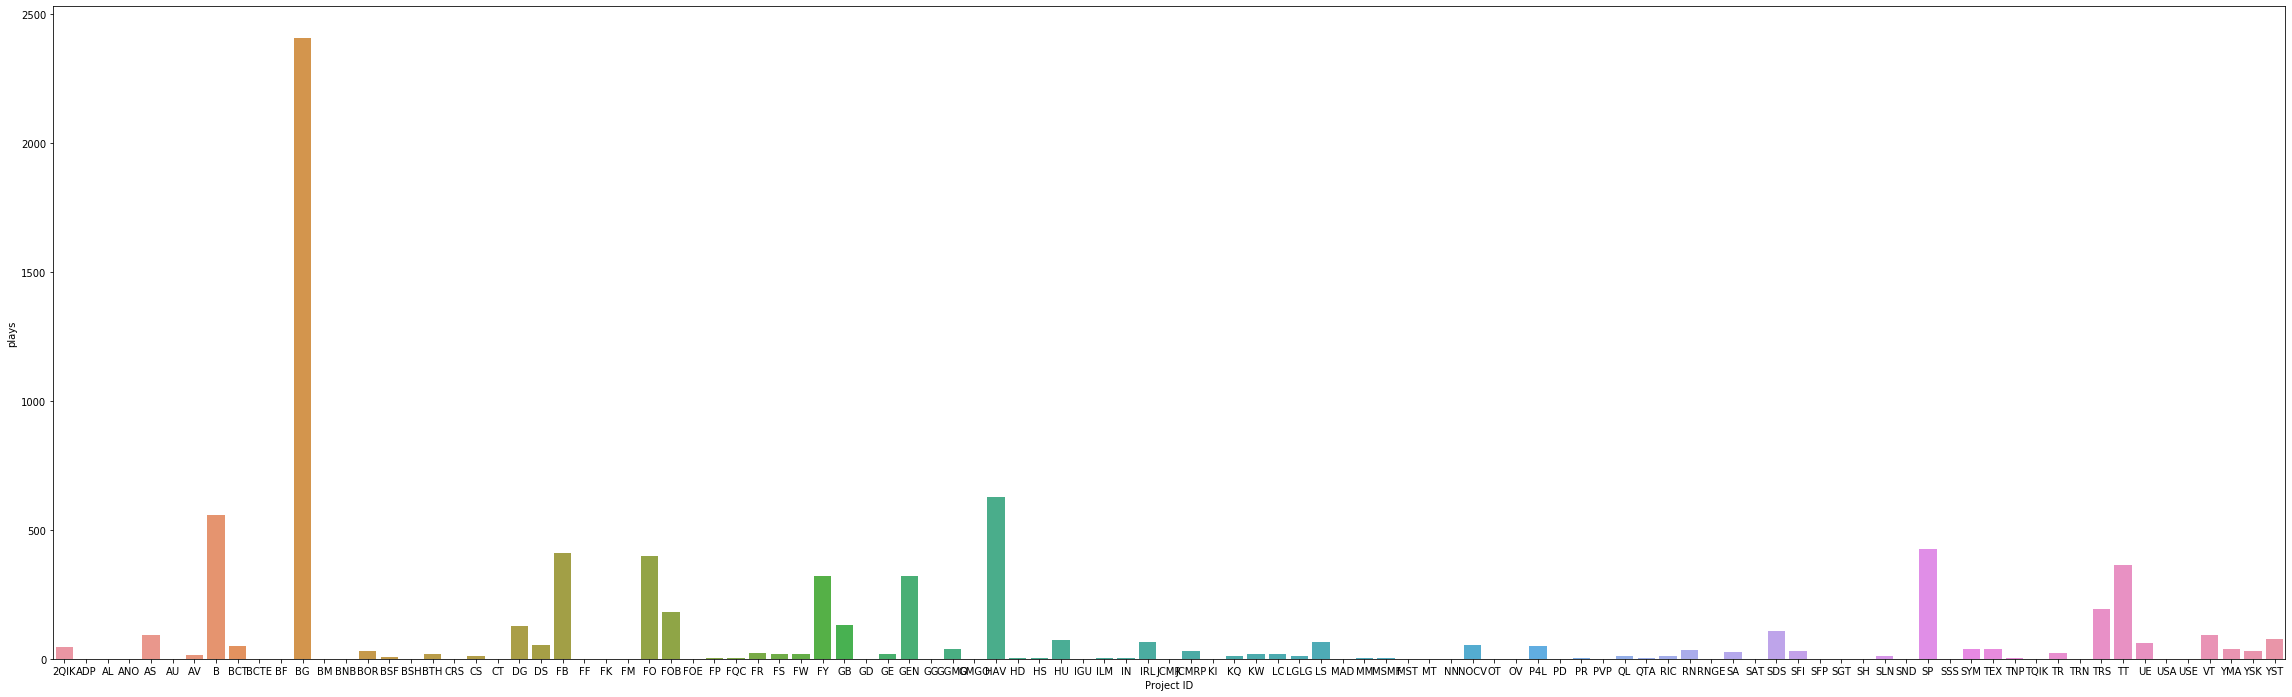

In [114]:
plt.figure(figsize=(40, 12))
sns.barplot(x=plays_by_project_df['Project ID'], y=plays_by_project_df['plays'])

In [119]:
vimeo_video_df[vimeo_video_df['Project ID'] == 'TT']

,Project ID,plays,downloads,loads,finishes,likes,comments,uri,name,duration,created_time,sizes,unique_loads,mean_percent,mean_seconds,sum_seconds,total_seconds,unique_viewers
14,TT,NaN,0.0,845.0,10.0,0.0,0.0,/videos/275714604,the T - Episode 1,333.0,2018-06-18T21:13:09+00:00,Array,257.0,63.0,192.0,19412.0,33633.0,71.0
19,TT,NaN,0.0,97.0,7.0,0.0,0.0,/videos/275711167,the T - Episode 2,473.0,2018-06-18T20:50:41+00:00,Array,48.0,76.0,356.0,16761.0,22277.0,36.0
33,TT,NaN,0.0,64.0,10.0,0.0,0.0,/videos/275708467,the T - Episode 3,373.0,2018-06-18T20:33:17+00:00,Array,37.0,77.0,289.0,9565.0,12309.0,24.0
42,TT,NaN,0.0,53.0,7.0,0.0,0.0,/videos/275699705,the T - Episode 4,570.0,2018-06-18T19:39:59+00:00,Array,29.0,80.0,460.0,13349.0,16559.0,20.0
47,TT,NaN,0.0,39.0,3.0,0.0,0.0,/videos/275682633,the T - Episode 6,441.0,2018-06-18T18:02:14+00:00,Array,22.0,84.0,371.0,8923.0,10608.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,TT,39.0,0.0,89.0,7.0,0.0,0.0,/videos/275693272,the T - Episode 5,391.0,2018-06-18T19:03:37+00:00,Array,NaN,78.0,281.0,10997.0,15249.0,NaN
45,TT,37.0,0.0,97.0,4.0,0.0,0.0,/videos/275699705,the T - Episode 4,570.0,2018-06-18T19:39:59+00:00,Array,NaN,77.0,404.0,14955.0,21123.0,NaN
52,TT,31.0,0.0,228.0,12.0,0.0,0.0,/videos/275676434,the T trailer,71.0,2018-06-18T17:24:44+00:00,Array,NaN,72.0,44.0,1391.0,2201.0,NaN
56,TT,29.0,0.0,74.0,6.0,0.0,0.0,/videos/275682633,the T - Episode 6,441.0,2018-06-18T18:02:14+00:00,Array,NaN,83.0,344.0,9980.0,12817.0,NaN


### The Number of videos for a group vs. the number of plays
*Q: Does a project having more content relate to the number of plays for that project?*

In [121]:
plays_by_project_df = vimeo_video_df.groupby('Project ID', as_index=False).agg({"plays": "sum", "": len})

In [123]:
grouped_projects = vimeo_video_df.groupby('Project ID', as_index=False)

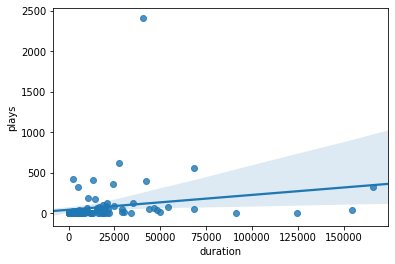

In [140]:
project_df = grouped_projects.agg({'plays':'sum'})
project_df['duration'] = grouped_projects.agg({'duration':'sum'})['duration']
sns.regplot(x=project_df['duration'], y=project_df['plays'])

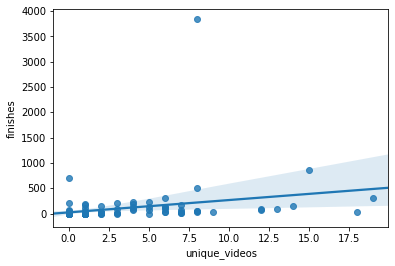

In [136]:
project_df = grouped_projects.agg({'finishes':'sum'})
project_df['unique_videos'] = grouped_projects.agg({'plays':'count'})['plays']
sns.regplot(x=project_df['unique_videos'], y=project_df['finishes'])

# TODO: plot interactively with Plotly

In [141]:
import plotly.express as px

In [142]:
df = grouped_projects.get_group('BG')

In [ ]:
#df = px.data.gapminder().query("continent=='Oceania'")
df = grouped_projects.get_group('BG')
fig = px.line(df, x="year", y="lifeExp", color='country')
fig.show()